In [4]:
import os
import re
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from scipy.stats import gmean

In [5]:
base_dir = "../logs/SPEC-CPU/"
# Define trace names and configuration labels
trace_names = ['429.mcf-184B', '450.soplex-247B', '462.libquantum-714B', 
'471.omnetpp-188B', '482.sphinx3-234B', '602.gcc_s-2226B']
configs = ['baseline', 'ipcp-l1', 'ipcp-l1-l2', 'isb-l1', 'isb-l2']

fields = ['L1D LOAD      ACCESS', 'L2C LOAD      ACCESS', 'LLC LOAD      ACCESS']
# Initialize a dictionary to store IPC values for each trace and configuration
mpki_values = {trace: {field: {} for field in fields } for trace in trace_names}

mpki_values

{'429.mcf-184B': {'L1D LOAD      ACCESS': {},
  'L2C LOAD      ACCESS': {},
  'LLC LOAD      ACCESS': {}},
 '450.soplex-247B': {'L1D LOAD      ACCESS': {},
  'L2C LOAD      ACCESS': {},
  'LLC LOAD      ACCESS': {}},
 '462.libquantum-714B': {'L1D LOAD      ACCESS': {},
  'L2C LOAD      ACCESS': {},
  'LLC LOAD      ACCESS': {}},
 '471.omnetpp-188B': {'L1D LOAD      ACCESS': {},
  'L2C LOAD      ACCESS': {},
  'LLC LOAD      ACCESS': {}},
 '482.sphinx3-234B': {'L1D LOAD      ACCESS': {},
  'L2C LOAD      ACCESS': {},
  'LLC LOAD      ACCESS': {}},
 '602.gcc_s-2226B': {'L1D LOAD      ACCESS': {},
  'L2C LOAD      ACCESS': {},
  'LLC LOAD      ACCESS': {}}}

In [6]:
def extract_mpki(field, log_file):
    with open(log_file, 'r') as f:
        for line in f:
            if field in line:
                mpki_value = float(re.search(r"MPKI:\s([\d\.]+)", line).group(1))
                return mpki_value
    return None

# Parse the IPC values from the log files
for trace in trace_names:
    for field in fields:
        for config in configs:
            log_file = base_dir + f"{trace}-{config}.log"
            mpki_values[trace][field][config] = extract_mpki(field, log_file)
# Calculate geometric mean for each configuration (excluding baseline)
geomeans = {field: {} for field in fields}
for config in configs:
    for field in fields:
        config_mpki = [mpki_values[trace][field][config] for trace in trace_names]
        geomeans[field][config] = gmean(config_mpki)  # Use scipy's gmean for geometric mean

mpki_values['Geomean'] = geomeans
trace_names += ['Geomean']
mpki_values

{'429.mcf-184B': {'L1D LOAD      ACCESS': {'baseline': 126.247,
   'ipcp-l1': 129.89,
   'ipcp-l1-l2': 129.896,
   'isb-l1': 114.377,
   'isb-l2': 126.246},
  'L2C LOAD      ACCESS': {'baseline': 91.2105,
   'ipcp-l1': 82.028,
   'ipcp-l1-l2': 81.9873,
   'isb-l1': 80.8158,
   'isb-l2': 81.3404},
  'LLC LOAD      ACCESS': {'baseline': 68.6851,
   'ipcp-l1': 51.2487,
   'ipcp-l1-l2': 51.2231,
   'isb-l1': 56.2238,
   'isb-l2': 55.5077}},
 '450.soplex-247B': {'L1D LOAD      ACCESS': {'baseline': 44.6552,
   'ipcp-l1': 30.9107,
   'ipcp-l1-l2': 30.3982,
   'isb-l1': 29.552,
   'isb-l2': 44.6534},
  'L2C LOAD      ACCESS': {'baseline': 35.271,
   'ipcp-l1': 17.8316,
   'ipcp-l1-l2': 17.2335,
   'isb-l1': 18.3442,
   'isb-l2': 17.5944},
  'LLC LOAD      ACCESS': {'baseline': 29.4909,
   'ipcp-l1': 14.9201,
   'ipcp-l1-l2': 14.2619,
   'isb-l1': 13.9097,
   'isb-l2': 12.324}},
 '462.libquantum-714B': {'L1D LOAD      ACCESS': {'baseline': 26.5299,
   'ipcp-l1': 4.82868,
   'ipcp-l1-l2': 4.260

In [8]:
def plot_mpki(field):
    x = np.arange(len(trace_names))  # X axis positions for the traces
    width = 0.17  # Width of the bars

    fig, ax = plt.subplots(figsize=(10, 6))

    # Plot bars for each configuration
    for i, config in enumerate(configs):  # Skip baseline
        _mpki_values = [mpki_values[trace][field][config] for trace in trace_names]
        bars = ax.bar(x + i*width, _mpki_values, width, label=config)

        # Annotate bars with speedup values
        for bar in bars:
            height = bar.get_height()
            ax.annotate(f'{height:.2f}',  # Format the annotation to 2 decimal places
                        xy=(bar.get_x() + bar.get_width() / 2, height),
                        xytext=(0, 3),  # Offset text slightly above the bar
                        textcoords="offset points",
                        ha='center', va='bottom',rotation=90)


    # Add labels and titles
    ax.set_xlabel('Trace')
    ax.set_ylabel('MPKI')
    # ax.set_ylim(0.8, 2.0)
    ax.set_title(f"{field[:8]} MPKI")
    ax.set_xticks(x + 4*width / 2)
    ax.set_xticklabels(trace_names, rotation=15)
    ax.legend()

    # Show the plot
    plt.tight_layout()
    plt.show()

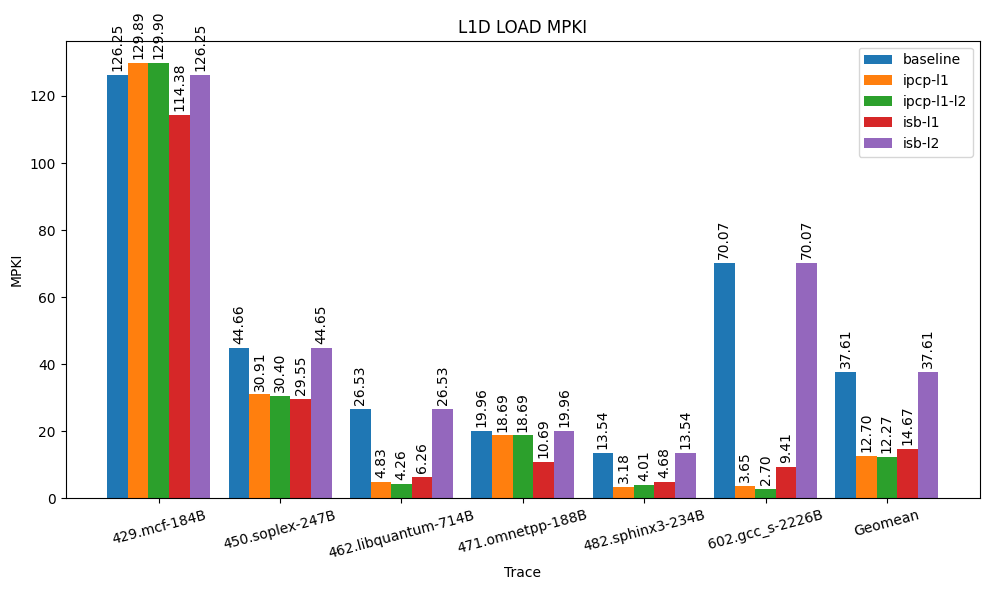

In [9]:
plot_mpki(fields[0])

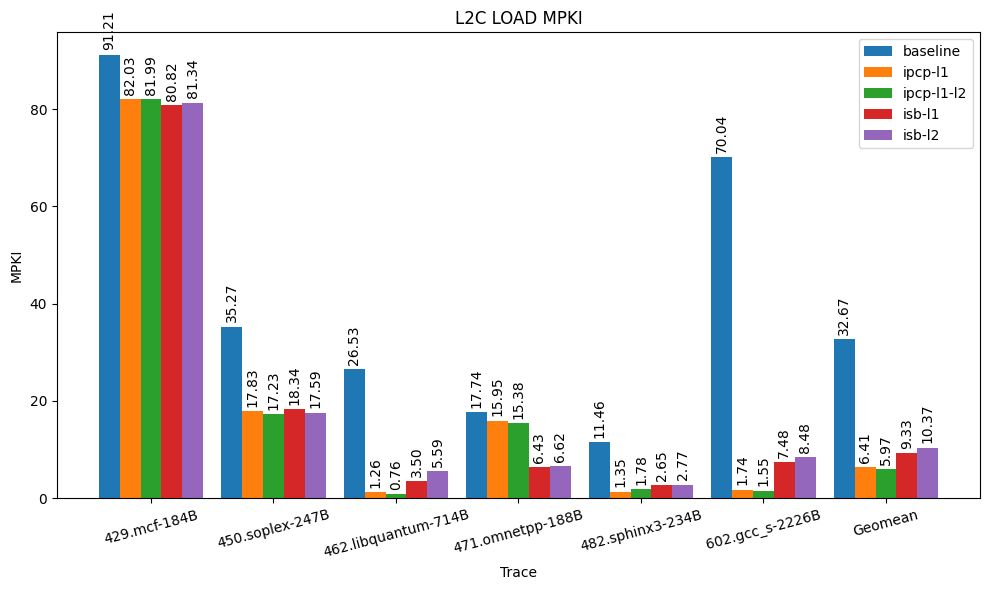

In [10]:
plot_mpki(fields[1])

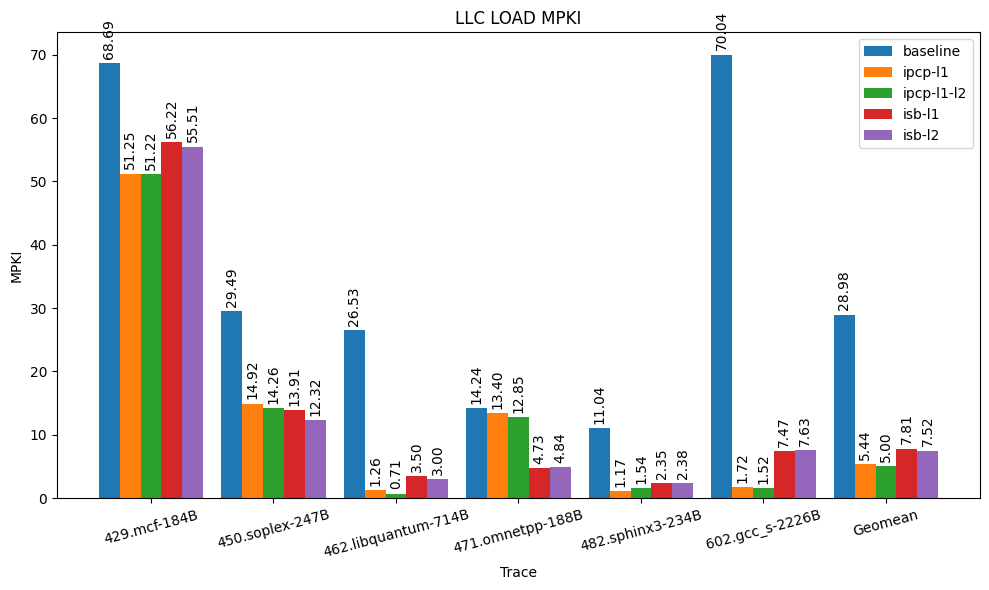

In [11]:
plot_mpki(fields[2])